In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [2]:
books = pd.read_csv('/kaggle/input/best-book-ever-data-for-2021/books_1.Best_Books_Ever.csv')
books.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [3]:
books.shape

(52478, 25)

In [4]:
books.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [5]:
books.drop(['bookId','isbn','coverImg','characters','bookFormat','edition','setting'], axis='columns', inplace=True)

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52478 entries, 0 to 52477
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             52478 non-null  object 
 1   series            23470 non-null  object 
 2   author            52478 non-null  object 
 3   rating            52478 non-null  float64
 4   description       51140 non-null  object 
 5   language          48672 non-null  object 
 6   genres            52478 non-null  object 
 7   pages             50131 non-null  object 
 8   publisher         48782 non-null  object 
 9   publishDate       51598 non-null  object 
 10  firstPublishDate  31152 non-null  object 
 11  awards            52478 non-null  object 
 12  numRatings        52478 non-null  int64  
 13  ratingsByStars    52478 non-null  object 
 14  likedPercent      51856 non-null  float64
 15  bbeScore          52478 non-null  int64  
 16  bbeVotes          52478 non-null  int64 

Some columns(pages,price) need to be changed to numberical types

In [7]:
books.isnull().sum()

title                   0
series              29008
author                  0
rating                  0
description          1338
language             3806
genres                  0
pages                2347
publisher            3696
publishDate           880
firstPublishDate    21326
awards                  0
numRatings              0
ratingsByStars          0
likedPercent          622
bbeScore                0
bbeVotes                0
price               14365
dtype: int64

Remove firstPublishDate

Change null values in Series to something else eg. "No Series"

Since is this just analysis and no other data science techniques like prediction will be use, changing the null values to something else would defeat the point of comparing the books

In [8]:
books['series'].replace(np.nan, 'No Series', inplace=True)
books.drop('firstPublishDate', axis='columns', inplace=True)

In [9]:
books['series'].isnull().sum()

0

In [10]:
books.describe(include='all')

,title,series,author,rating,description,language,genres,pages,publisher,publishDate,awards,numRatings,ratingsByStars,likedPercent,bbeScore,bbeVotes,price
count,52478,52478,52478,52478.000000,51140,48672,52478,50131,48782,51598,52478,5.247800e+04,52478,51856.000000,5.247800e+04,52478.000000,38113
unique,49927,22803,28227,NaN,50888,81,44154,1365,11110,10635,9215,NaN,49908,NaN,NaN,NaN,3776
top,Legacy,No Series,Nora Roberts (Goodreads Author),NaN,"هذه هي طبعة ""دار الفكر - بيروت"" وهي آخر طبعة ع...",English,[],320,Vintage,Published,[],NaN,[],NaN,NaN,NaN,5.20
freq,14,29008,86,NaN,37,42661,4623,1049,572,586,41864,NaN,1423,NaN,NaN,NaN,626
mean,NaN,NaN,NaN,4.021878,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.787865e+04,NaN,92.231545,1.984023e+03,22.529003,NaN
std,NaN,NaN,NaN,0.367146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.039448e+05,NaN,5.990689,3.515314e+04,369.158541,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000,0.000000e+00,-4.000000,NaN
25%,NaN,NaN,NaN,3.820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.410000e+02,NaN,90.000000,8.400000e+01,1.000000,NaN
50%,NaN,NaN,NaN,4.030000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.307000e+03,NaN,94.000000,9.700000e+01,1.000000,NaN
75%,NaN,NaN,NaN,4.230000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.380500e+03,NaN,96.000000,1.870000e+02,2.000000,NaN


In [11]:
books['publishDate'].value_counts()

Published             586
2008                  256
2009                  226
2007                  222
2006                  210
                     ... 
June 29th 2000          1
January 5th 1985        1
April 27th 2015         1
September 3rd 1968      1
August 21st 2011        1
Name: publishDate, Length: 10635, dtype: int64

Combinations of all diffrent types for date formats it seems

In [12]:
books['pages'].replace('1 page', 1, inplace=True)
books['pages'] = books['pages'].astype('float')

In [13]:
books['price'].replace(np.nan, 'No', inplace=True)

for pri in books['price']:
    if len(pri) == 8:
        books['price'].replace(pri, 'Remove', inplace=True)
        
books = books.loc[books['price'] != 'Remove']

In [14]:
books['price'].replace('No', np.nan, inplace=True)
books['price'] = books['price'].astype('float') 

In [15]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52466 entries, 0 to 52477
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           52466 non-null  object 
 1   series          52466 non-null  object 
 2   author          52466 non-null  object 
 3   rating          52466 non-null  float64
 4   description     51129 non-null  object 
 5   language        48662 non-null  object 
 6   genres          52466 non-null  object 
 7   pages           50119 non-null  float64
 8   publisher       48770 non-null  object 
 9   publishDate     51586 non-null  object 
 10  awards          52466 non-null  object 
 11  numRatings      52466 non-null  int64  
 12  ratingsByStars  52466 non-null  object 
 13  likedPercent    51844 non-null  float64
 14  bbeScore        52466 non-null  int64  
 15  bbeVotes        52466 non-null  int64  
 16  price           38101 non-null  float64
dtypes: float64(4), int64(3), object

In [16]:
books.describe()

,rating,pages,numRatings,likedPercent,bbeScore,bbeVotes,price
count,52466.000000,50119.000000,5.246600e+04,51844.000000,5.246600e+04,52466.000000,38101.000000
mean,4.021844,328.524113,1.788249e+04,92.231116,1.984447e+03,22.533812,9.657241
std,0.367123,252.236732,1.039564e+05,5.990574,3.515715e+04,369.200618,24.297213
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000,0.840000
25%,3.820000,210.000000,3.410000e+02,90.000000,8.400000e+01,1.000000,3.240000
50%,4.030000,304.000000,2.308000e+03,94.000000,9.700000e+01,1.000000,5.200000
75%,4.230000,392.000000,9.383750e+03,96.000000,1.870000e+02,2.000000,8.860000
max,5.000000,14777.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000,898.640000


In [17]:
books['publishDate'] = books['publishDate'].astype('str')

for day in books['publishDate']:
    try:
        day = pd.to_datetime(day)
    except:
        books['publishDate'].replace(day, 'Remove', inplace=True)
        

books = books[(books['publishDate'] != 'Published') & (books['publishDate'] != 'Remove')]





In [18]:
books['publishDate'] = pd.to_datetime(books['publishDate'])
books['publishDate'] = pd.DatetimeIndex(books['publishDate']).year

In [19]:
books.head()

,title,series,author,rating,description,language,genres,pages,publisher,publishDate,awards,numRatings,ratingsByStars,likedPercent,bbeScore,bbeVotes,price
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374.0,Scholastic Press,2008.0,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,2993816,30516,5.09
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...",870.0,Scholastic Inc.,2004.0,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,2632233,26923,7.38
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",324.0,Harper Perennial Modern Classics,2006.0,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,2269402,23328,NaN
3,Pride and Prejudice,No Series,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"['Classics', 'Fiction', 'Romance', 'Historical...",279.0,Modern Library,2000.0,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,1983116,20452,NaN
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501.0,"Little, Brown and Company",2006.0,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,1459448,14874,2.10


In [20]:
books['ratingsByStars']=books['ratingsByStars'].astype(str).str.replace('\[|\]|\'', '')
books['ratingsByStars'] = books['ratingsByStars'].str.replace(' ', '')
result = books['ratingsByStars'].str.split(',')
five_star = []
for index, rate in enumerate(result):
    five_star.append(rate[0])
five_star
    
books['5_starAmount'] = five_star
books['5_starAmount'].replace('', 0, inplace=True)
books['5_starAmount']= books['5_starAmount'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [21]:
books['5_starAmount'].describe()

count    5.156100e+04
mean     7.398558e+03
std      5.117153e+04
min      0.000000e+00
25%      1.240000e+02
50%      8.440000e+02
75%      3.489000e+03
max      4.578137e+06
Name: 5_starAmount, dtype: float64

## Basic Analysis

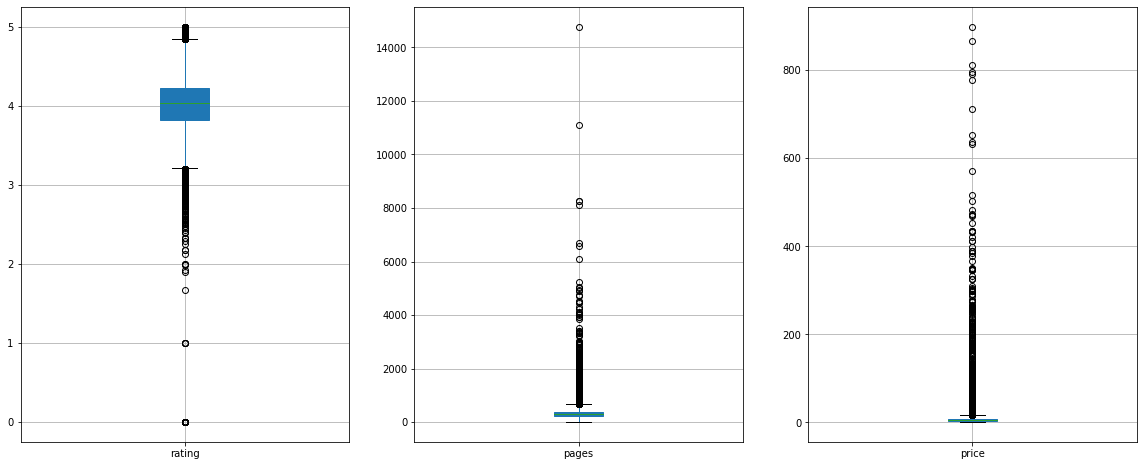

In [22]:
fig, axes = plt.subplots(1,3, figsize = (20,8))
books.boxplot(['rating'], patch_artist =True, ax=axes[0])
books.boxplot(['pages'], patch_artist = True, ax=axes[1])
books.boxplot(['price'], patch_artist = True, ax=axes[2])
plt.show()

For all three, it seems like most of the values are close together, but do have many outliers, especially the pages and price.
* The rating seems to be mostly between the upper 3 and 4 star range, with many outliers below
* Very small range in pages compared to the lengths of the bigger books in the list. Typically around 300 pages
* Every smaller rage in price, with really high outliers, some even being over 600 dollars. Typically around 9 dollars

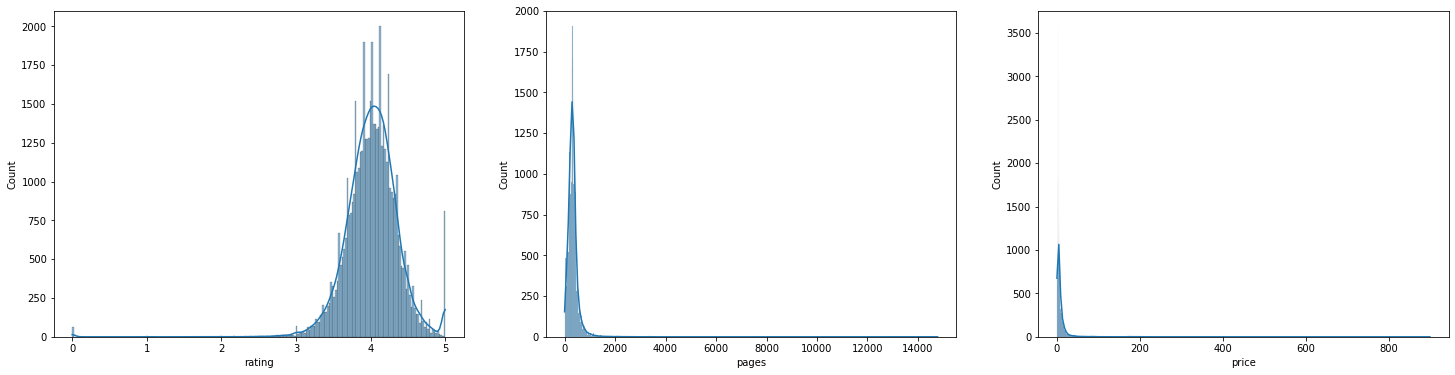

In [23]:
fig, axes = plt.subplots(1,3, figsize = (25,6))
sns.histplot(data=books, x='rating', ax=axes[0], kde=True)
sns.histplot(data=books, x='pages', ax=axes[1], kde=True)
sns.histplot(data=books, x='price', ax=axes[2], kde=True)
plt.show()


<AxesSubplot:xlabel='publishDate', ylabel='Count'>

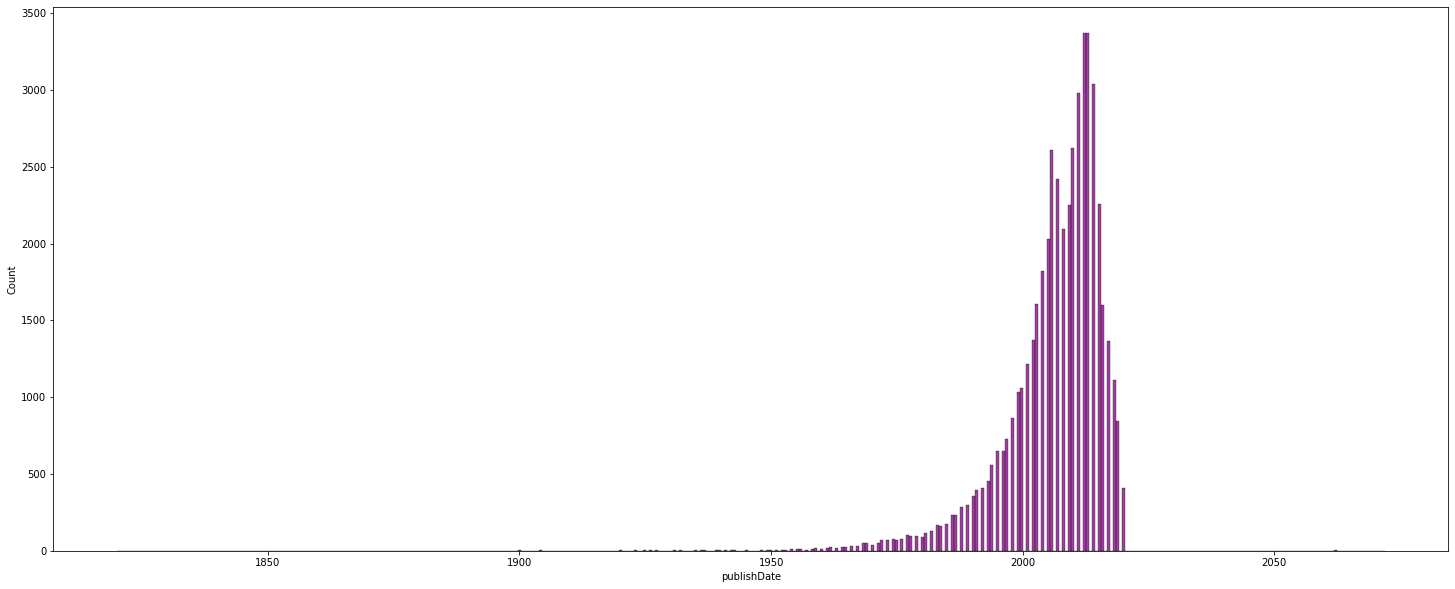

In [24]:
plt.figure(figsize=(25,10))
sns.histplot(data=books, x='publishDate', color='purple')

Seems that most of the books on the popularity list are fairly recent, with the peak being around the 2010s.

In [25]:
rate_book = books.sort_values(['numRatings'],ascending =False, axis=0)
rate_book

,title,series,author,rating,description,language,genres,pages,publisher,publishDate,awards,numRatings,ratingsByStars,likedPercent,bbeScore,bbeVotes,price,5_starAmount
32,Harry Potter and the Sorcerer's Stone,Harry Potter #1,"J.K. Rowling, Mary GrandPré (Illustrator)",4.47,Harry Potter's life is miserable. His parents ...,English,"['Fantasy', 'Fiction', 'Young Adult', 'Magic',...",309.0,Scholastic Inc,2003.0,"[""Mythopoeic Fantasy Award for Children's Lite...",7048471,"4578137,1611874,600384,139551,118525",96.0,691430,7348,NaN,4578137
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...",374.0,Scholastic Press,2008.0,['Locus Award Nominee for Best Young Adult Boo...,6376780,"3444695,1921313,745221,171994,93557",96.0,2993816,30516,5.09,3444695
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...",501.0,"Little, Brown and Company",2006.0,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"1751460,1113682,1008686,542017,548674",78.0,1459448,14874,2.10,1751460
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"['Classics', 'Fiction', 'Historical Fiction', ...",324.0,Harper Perennial Modern Classics,2006.0,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"2363896,1333153,573280,149952,80794",95.0,2269402,23328,NaN,2363896
27,The Great Gatsby,No Series,"F. Scott Fitzgerald, Francis Scott Fitzgerald",3.92,Alternate Cover Edition ISBN: 0743273567 (ISBN...,English,"['Classics', 'Fiction', 'School', 'Literature'...",200.0,Scribner,2004.0,['Grammy Award Nominee for Best Spoken Word Al...,3775504,"1345866,1266424,798955,252115,112144",90.0,755074,8142,NaN,1345866
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41746,"How to Disappear: From Abusive Spouses, Bloodh...",No Series,"Derrick Jensen (Editor), Tony Millionaire (Ill...",0.00,"From ATMs to DNA, privacy is increasingly unde...",English,[],112.0,Context Books,2000.0,[],0,,NaN,78,1,NaN,0
45675,Respect and Resilience,Larva High School: Book 1 #2,"Mia S. Beck (Goodreads Author), Stine Falkenbe...",0.00,"""Sara felt sick to her stomach and ran into he...",English,[],NaN,NaN,NaN,[],0,,NaN,65,1,NaN,0
28472,giveaways,No Series,A.N. Shekarnia,0.00,a science-fantasy adventure for children of 12...,English,[],426.0,Bronwyn Editions,2011.0,[],0,,NaN,96,1,NaN,0
24055,From Petal To Sepal,No Series,Quiana Frazier,0.00,A unique collection of poetic works expressing...,English,[],119.0,"WE-LIT, Inc.",2010.0,[],0,,NaN,98,1,20.04,0


In [26]:
def barplot(y,x,title):
    plt.figure(figsize=(20,10))
    sns.barplot(y=y, x=x)
    plt.title(title)
    plt.tight_layout()
    plt.show()
    

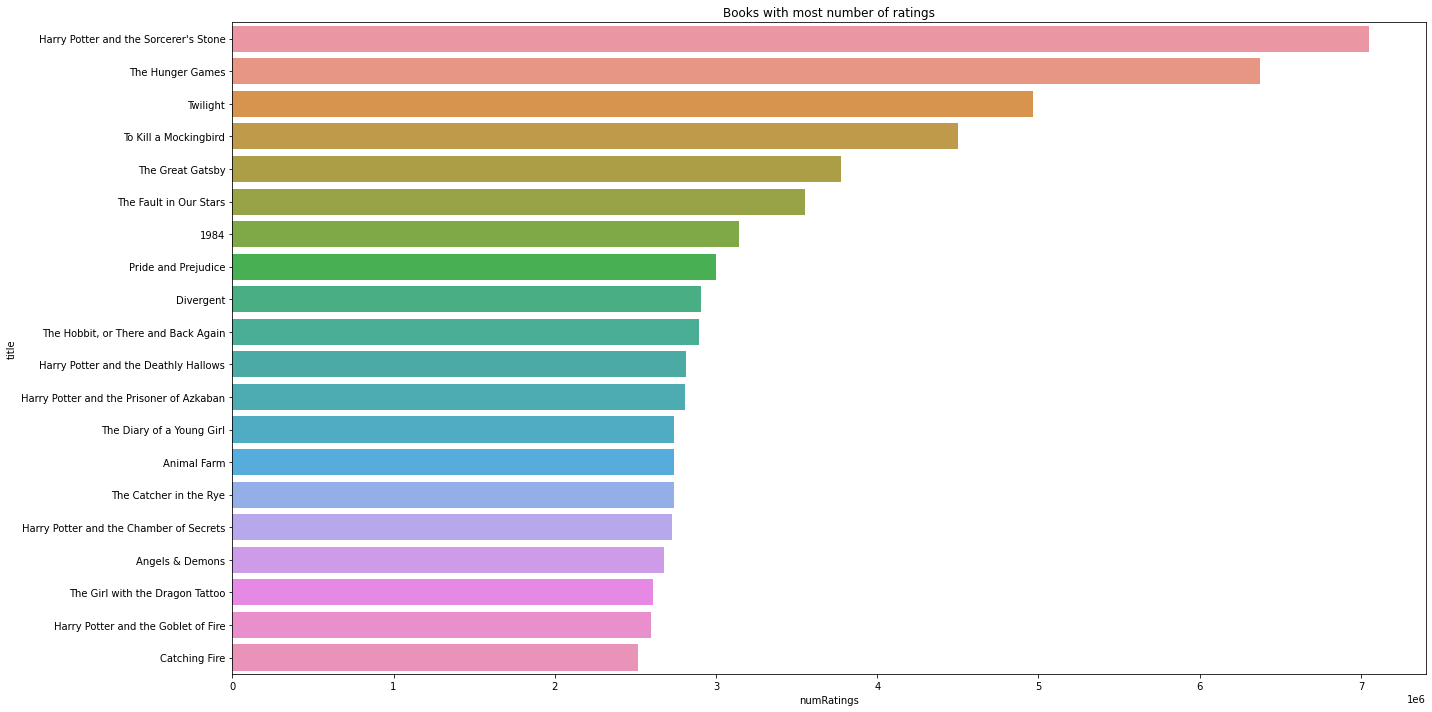

In [27]:
#plt.figure(figsize=(10,10))
#sns.barplot(y=rate_book['title'].head(20), x=rate_book['numRatings'].head(20))

barplot(rate_book['title'].head(20),rate_book['numRatings'].head(20),'Books with most number of ratings')

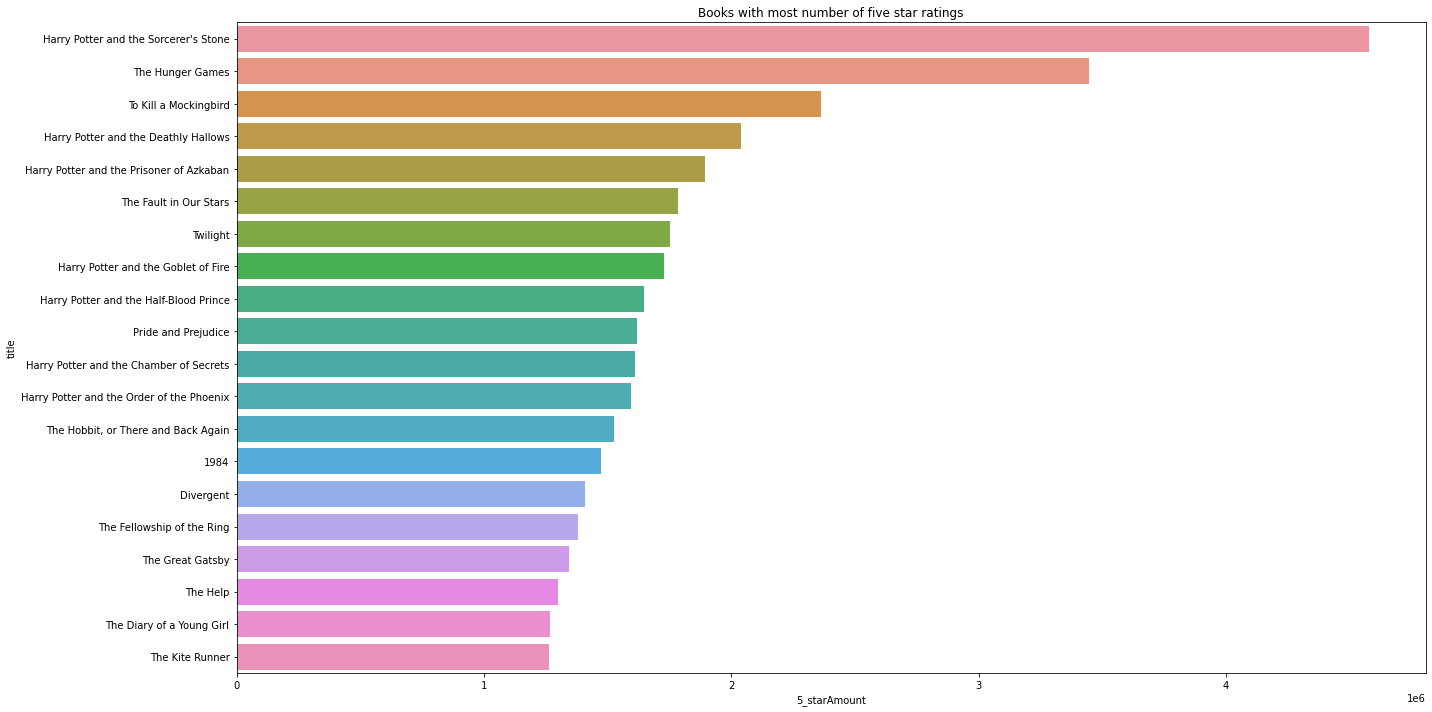

In [28]:
five_star_book = books.sort_values(['5_starAmount'],ascending =False, axis=0)

barplot(five_star_book['title'].head(20),five_star_book['5_starAmount'].head(20),'Books with most number of five star ratings')

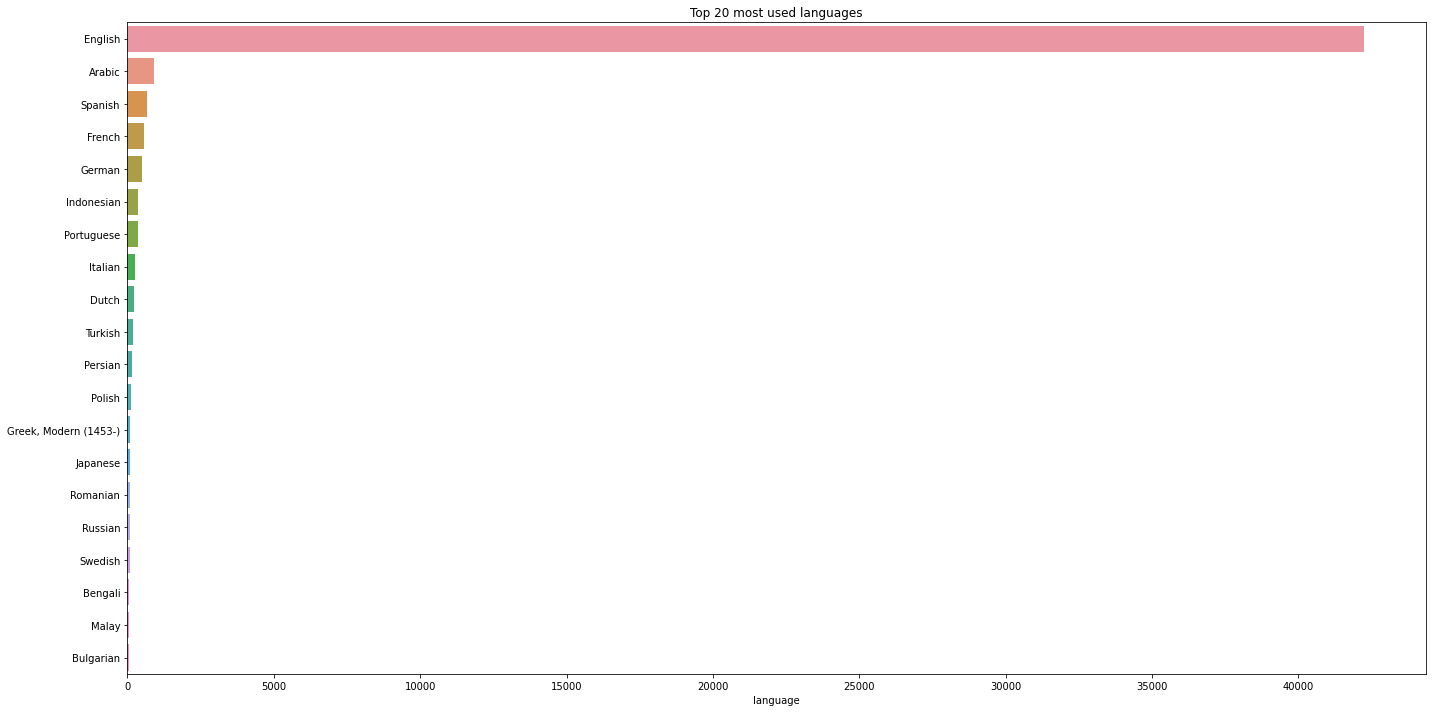

In [29]:
lan_books = books['language'].value_counts()

#plt.figure(figsize=(10,8))
#sns.barplot(y=lan_books.head(20).index, x=lan_books.head(20))
#plt.show()

barplot(lan_books.head(20).index,lan_books.head(20), 'Top 20 most used languages')

In [30]:
amount_books = books['title'].value_counts()

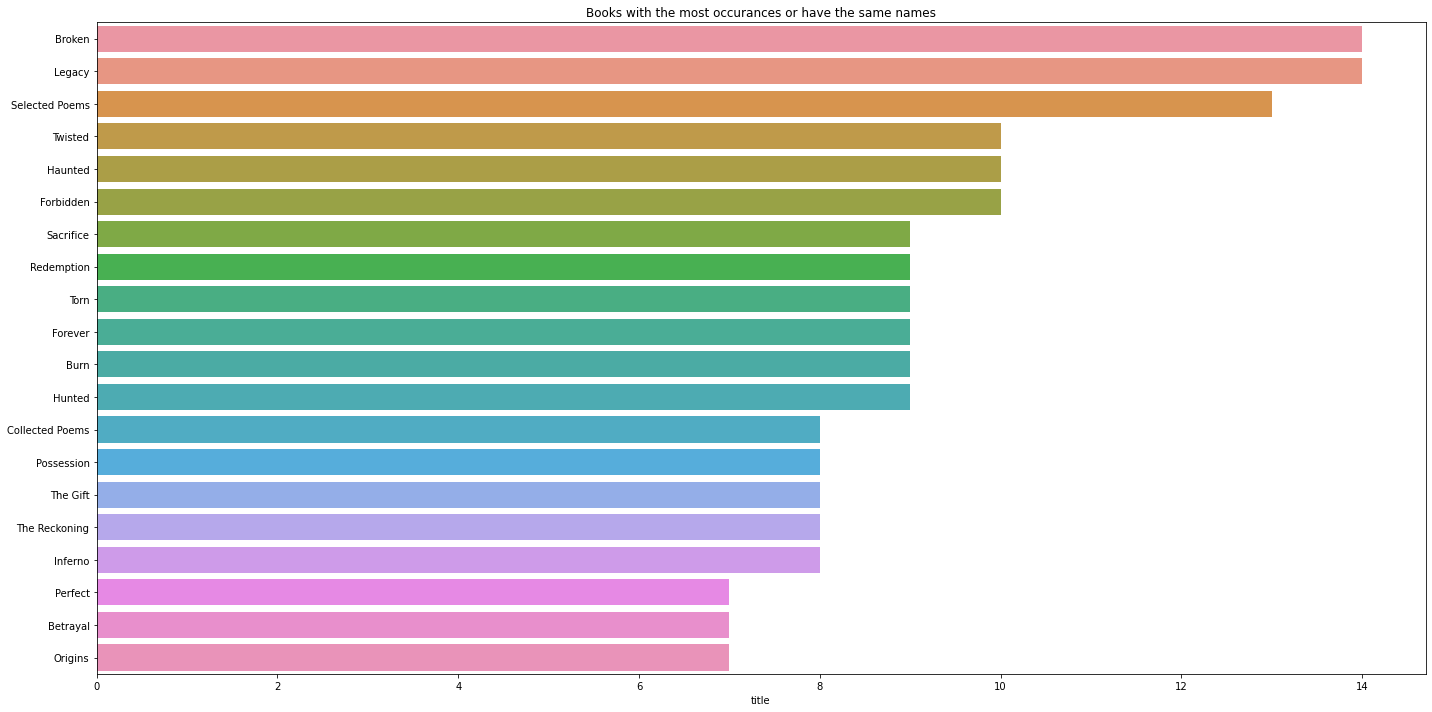

In [31]:
barplot(amount_books.head(20).index, amount_books.head(20), 'Books with the most occurances or have the same names')

In [32]:
books['genres']=books['genres'].astype(str).str.replace('\[|\]|\'', '')


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [33]:
def split(df, col):
    result = df[col].str.get_dummies(',')
    return result

In [34]:
books['genres'] = books['genres'].str.replace(' ', '')
genre_list = split(books, 'genres')

In [35]:
books_full = pd.concat([books, genre_list], axis = 1, sort = False)
books_full.head()

,title,series,author,rating,description,language,genres,pages,publisher,publishDate,...,YoungAdultParanormal,YoungAdultRomance,YoungAdultScienceFiction,YoungReaders,Yuri,Zambia,Zen,Zimbabwe,Zombies,漫画
0,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,"YoungAdult,Fiction,Dystopia,Fantasy,ScienceFic...",374.0,Scholastic Press,2008.0,...,0,0,0,0,0,0,0,0,0,0
1,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,"Fantasy,YoungAdult,Fiction,Magic,Childrens,Adv...",870.0,Scholastic Inc.,2004.0,...,0,0,0,0,0,0,0,0,0,0
2,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,"Classics,Fiction,HistoricalFiction,School,Lite...",324.0,Harper Perennial Modern Classics,2006.0,...,0,0,0,0,0,0,0,0,0,0
3,Pride and Prejudice,No Series,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,"Classics,Fiction,Romance,HistoricalFiction,Lit...",279.0,Modern Library,2000.0,...,0,0,0,0,0,0,0,0,0,0
4,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,"YoungAdult,Fantasy,Romance,Vampires,Fiction,Pa...",501.0,"Little, Brown and Company",2006.0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
genre_amount = genre_list.sum(axis=0).sort_values(ascending=False)
genre_amount

Fiction            31323
Romance            15310
Fantasy            14901
YoungAdult         11742
Contemporary       10408
                   ...  
MoneyManagement        1
Motorcycling           1
Museology              1
Muslims                1
漫画                     1
Length: 981, dtype: int64

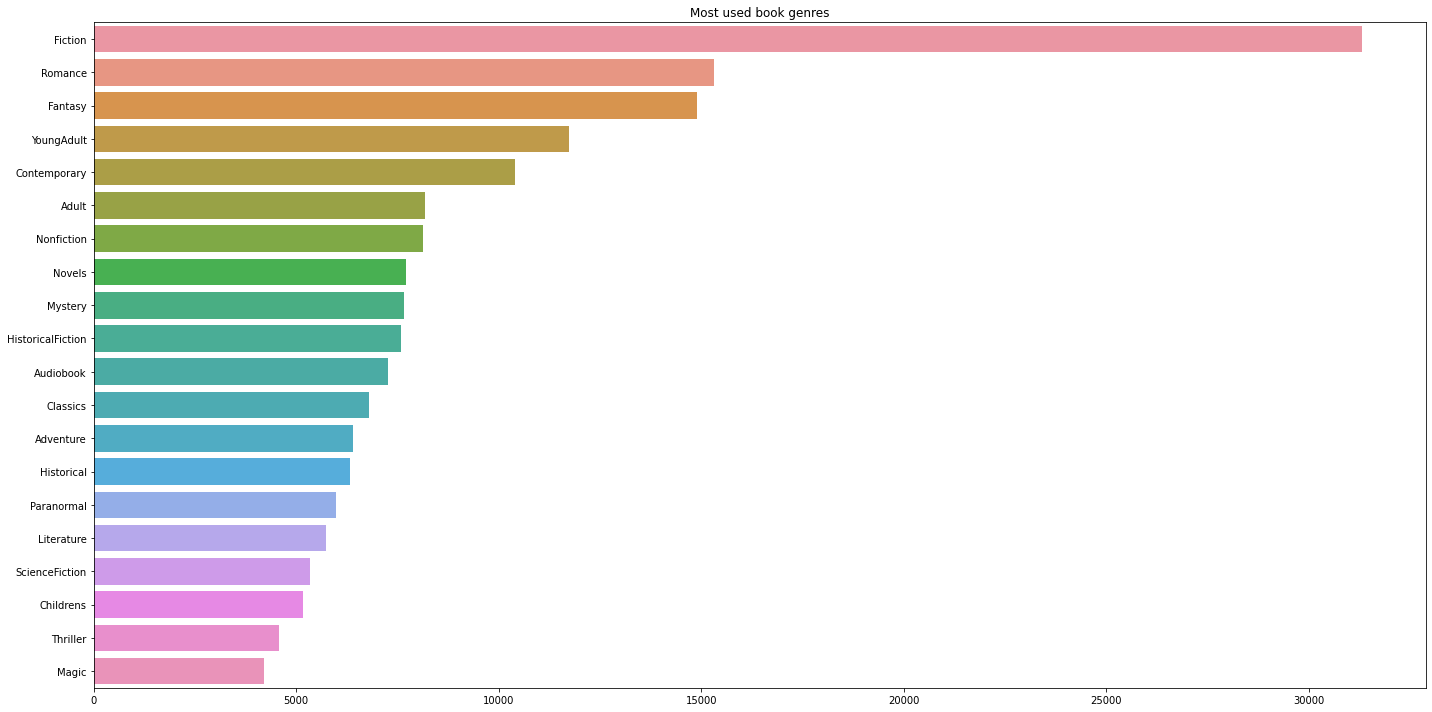

In [37]:
barplot(genre_amount.head(20).index, genre_amount.head(20), 'Most used book genres')

In [38]:
author_info = books.groupby('author').aggregate({'numRatings':'sum', 'title': 'count','pages': 'mean', '5_starAmount': 'sum'}).sort_values('numRatings', ascending=False)
author_info

,numRatings,title,pages,5_starAmount
author,,,,
"J.K. Rowling, Mary GrandPré (Illustrator)",17790643,7,982.714286,11489614
Suzanne Collins,11654607,11,337.100000,5789574
Stephenie Meyer,10709044,13,801.307692,3729894
Stephen King (Goodreads Author),10263576,66,531.531250,3995881
Rick Riordan (Goodreads Author),8135714,31,420.966667,4316208
...,...,...,...,...
Vanessa M. Chattman,0,1,28.000000,0
Eugen Roth,0,1,638.000000,0
L.R.Lee (Goodreads Author),0,2,241.000000,0


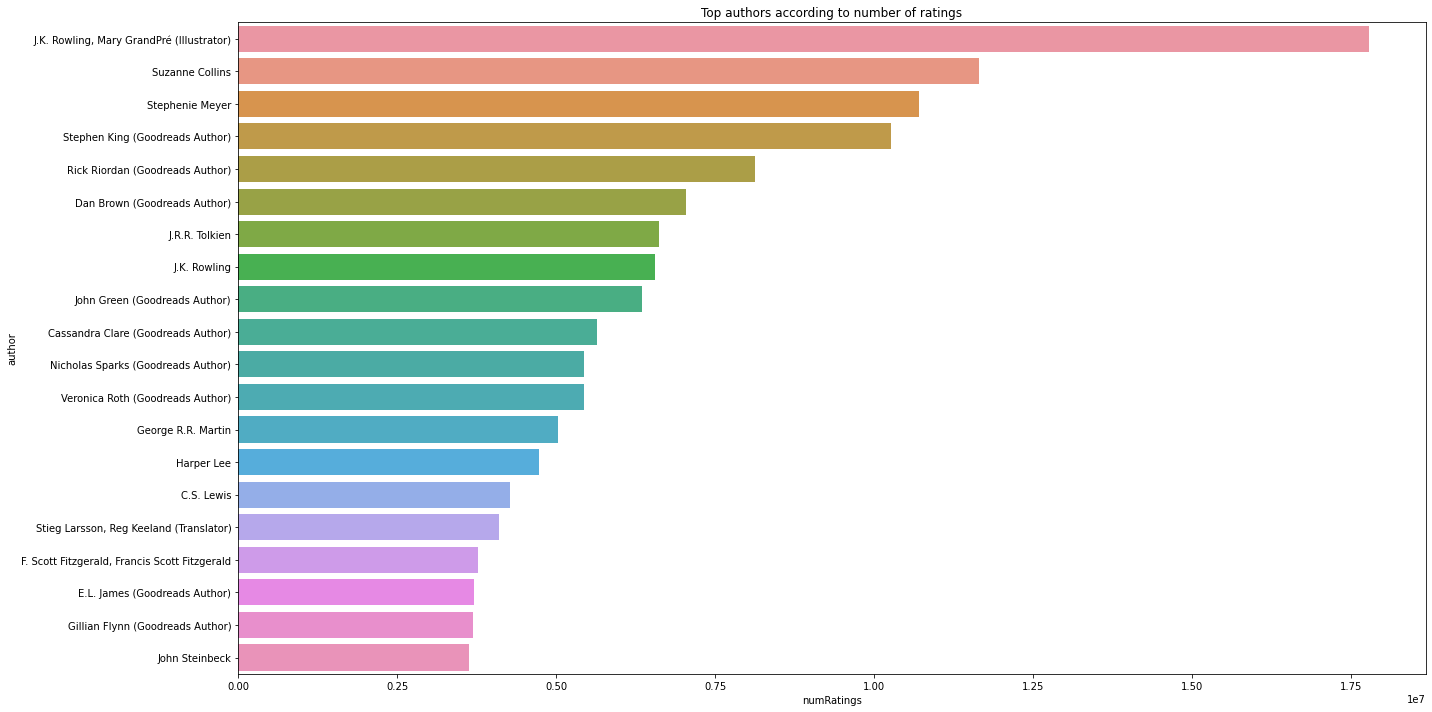

In [39]:
barplot(author_info.head(20).index, author_info['numRatings'].head(20), 'Top authors according to number of ratings')

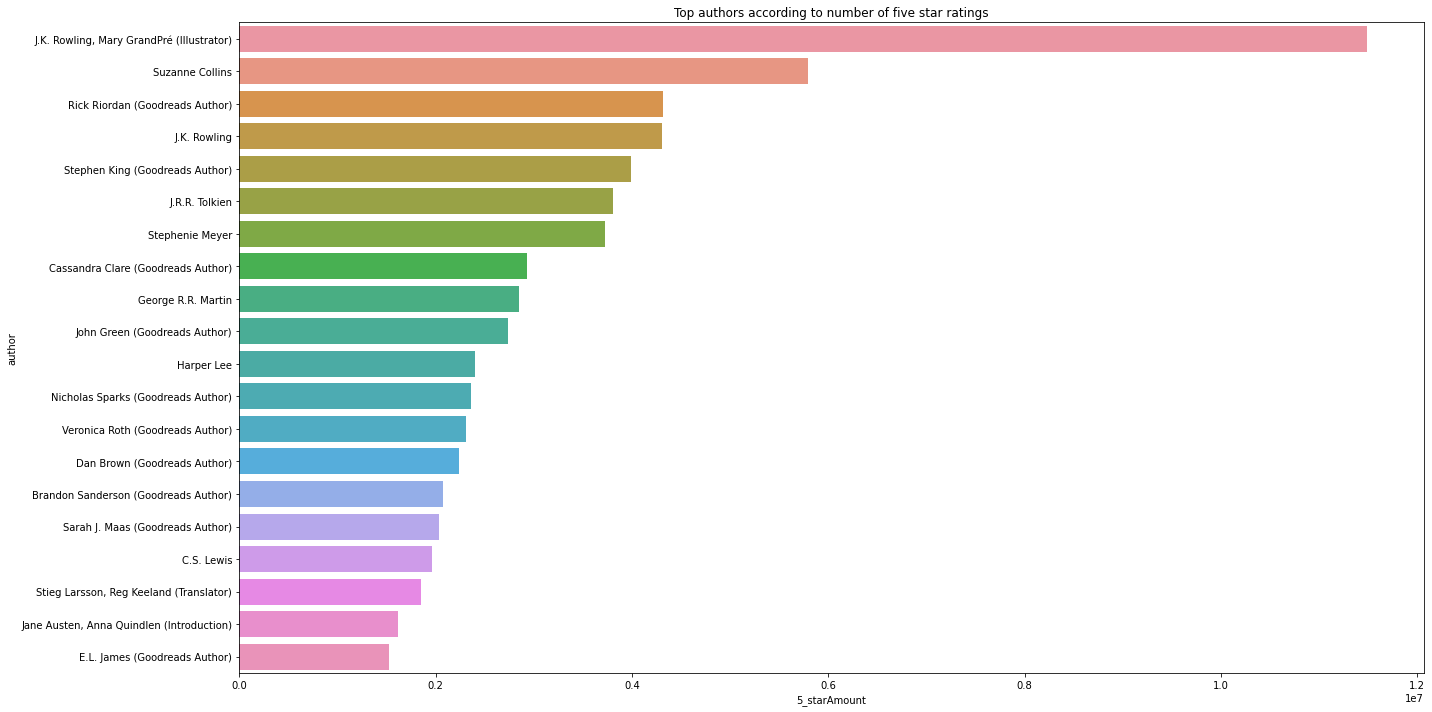

In [40]:
author_info.sort_values('5_starAmount', ascending=False, inplace=True)
barplot(author_info.head(20).index, author_info['5_starAmount'].head(20), 'Top authors according to number of five star ratings')

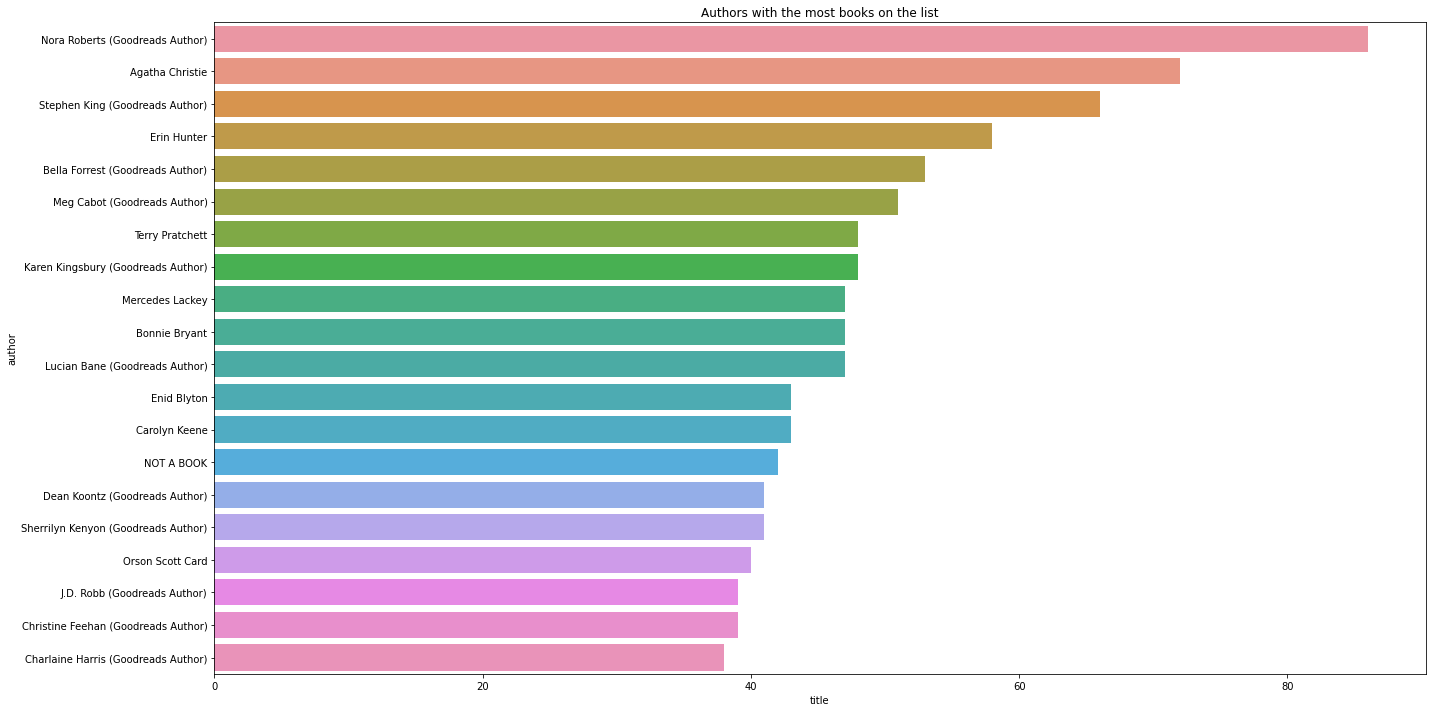

In [41]:
author_info.sort_values('title', ascending = False, inplace=True)
barplot(author_info.head(20).index, author_info['title'].head(20), 'Authors with the most books on the list')

In [42]:
books.loc[books['genres'].str.contains('Magic')]['rating'].mean()

4.023398282002933

In [43]:
page_avg = []
for genre in genre_amount.index:
    page_avg.append(books.loc[books['genres'].str.contains(genre)]['pages'].mean())

In [44]:
rate_sum = []
for genre in genre_amount.index:
    rate_sum.append(books.loc[books['genres'].str.contains(genre)]['5_starAmount'].sum())

In [45]:
genre_pages = {'genre':genre_amount.index, 'page_avg':page_avg, '5_star_sum':rate_sum}
avg_page_genre = pd.DataFrame(genre_pages).sort_values('page_avg', ascending=False)
avg_page_genre

,genre,page_avg,5_star_sum
920,ElectricalEngineering,952.000000,463
861,Naturopathy,936.000000,515
798,Academics,886.000000,1979
851,Words,815.000000,88
658,Dictionaries,765.000000,7419
...,...,...,...
688,Counting,32.000000,234543
930,Benin,32.000000,4
929,BackToSchool,32.000000,20634
790,Aeroplanes,27.333333,331


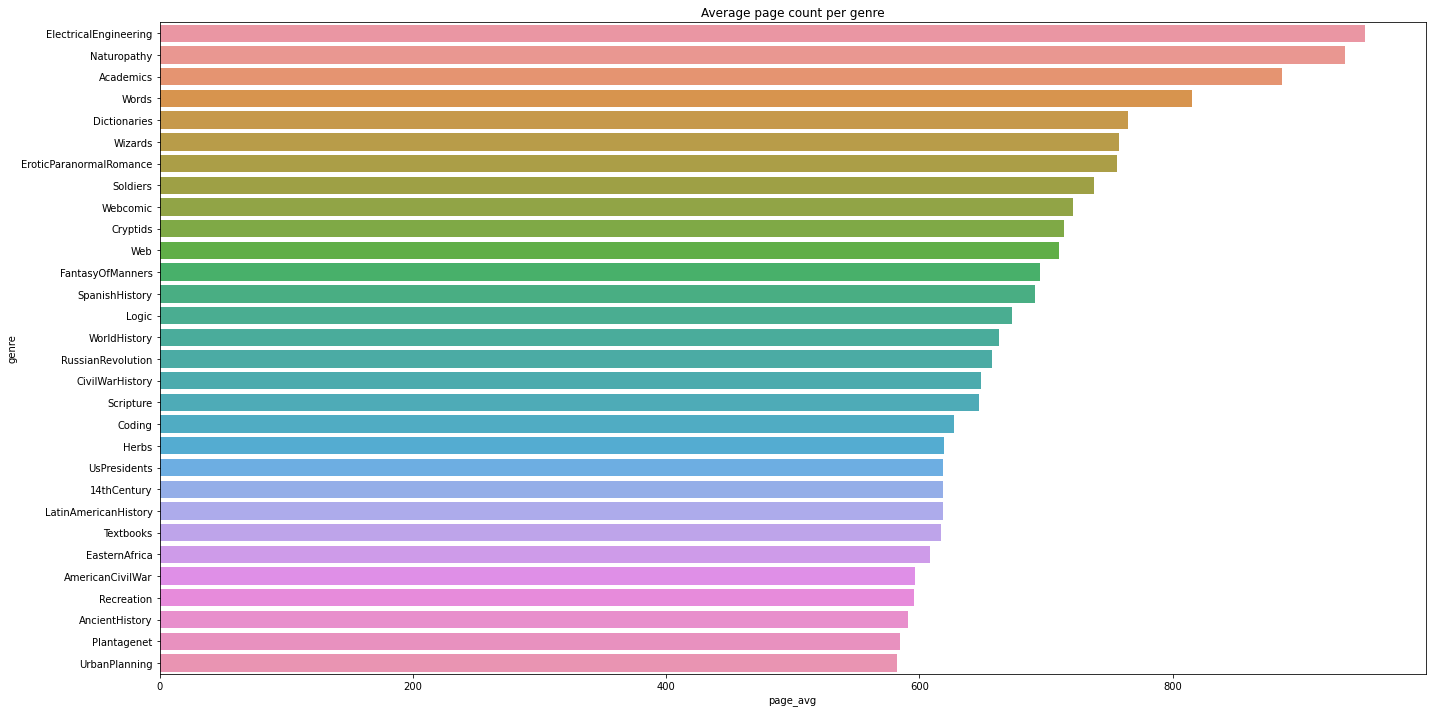

In [46]:
barplot(avg_page_genre['genre'].head(30), avg_page_genre['page_avg'].head(30), 'Average page count per genre')

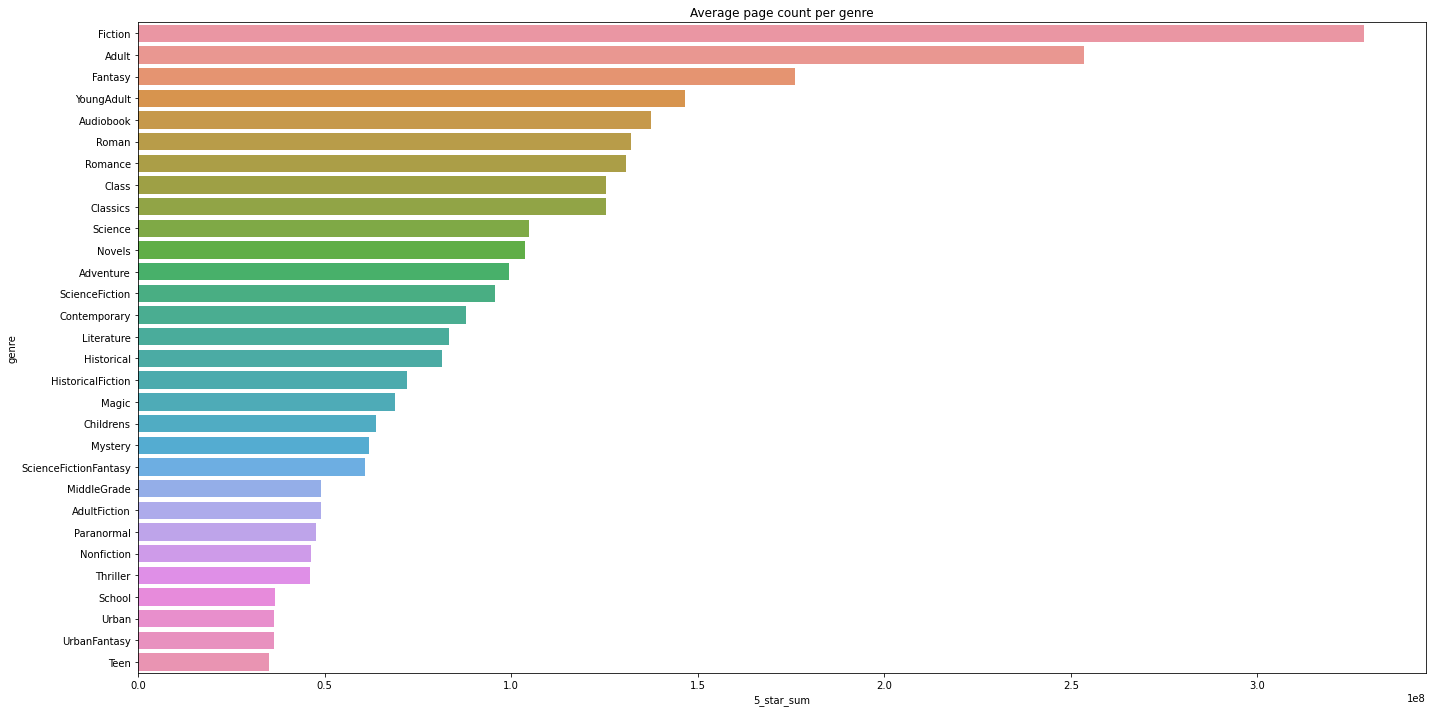

In [47]:
sum_5star_genre = avg_page_genre.sort_values('5_star_sum', ascending=False)

barplot(sum_5star_genre['genre'].head(30), sum_5star_genre['5_star_sum'].head(30), 'Average page count per genre')

Seems that the acedemic focused books have higher page counts 

In [48]:
author_page = books.groupby('author')['pages'].mean().sort_values(ascending=False)
author_page

author
Will Durant, Ariel Durant                       14777.0
Wildbow, J.C. McCrae                             6680.0
ابن كثير                                         6088.0
Eiichiro Oda                                     4904.0
Ash Stone (Goodreads Author)                     4892.0
                                                 ...   
محمد غازي الأخرس                                    NaN
منوچهر مطیعی                                        NaN
نهى أمر الله                                        NaN
هنری ون دایک, حسین الهی قمشه ای (translator)        NaN
籽月                                                  NaN
Name: pages, Length: 27825, dtype: float64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  """


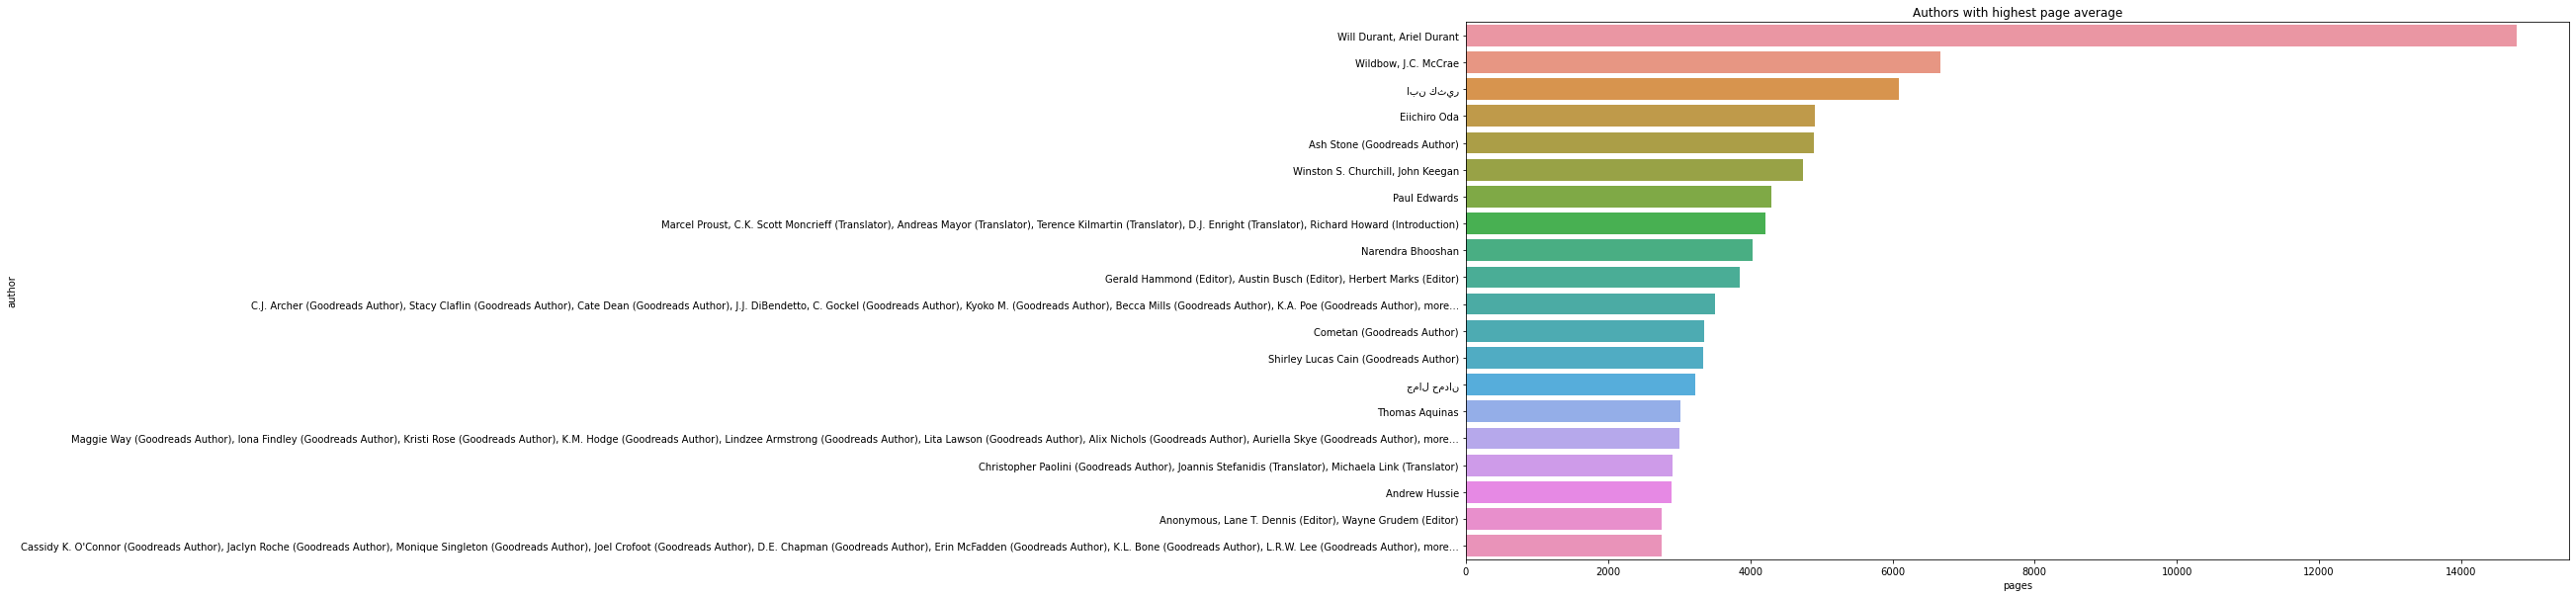

In [49]:
barplot(author_page.head(20).index, author_page.head(20), 'Authors with highest page average')

Now with something more familiar

In [50]:
pop_author_info = author_info[:31].sort_values('pages', ascending=False)
pop_author_info

,numRatings,title,pages,5_starAmount
author,,,,
J.R. Ward (Goodreads Author),1699976,36,630.600000,896535
Stephen King (Goodreads Author),10263576,66,531.531250,3995881
Kristen Ashley (Goodreads Author),1135894,37,487.277778,586165
Laurell K. Hamilton (Goodreads Author),1431489,37,447.702703,570179
Dean Koontz (Goodreads Author),1615455,41,431.073171,562968
Mercedes Lackey,519250,47,428.750000,206440
Charlaine Harris (Goodreads Author),2875006,38,422.026316,958925
Sherrilyn Kenyon (Goodreads Author),1125311,41,416.658537,562260
J.D. Robb (Goodreads Author),943566,39,410.000000,462486


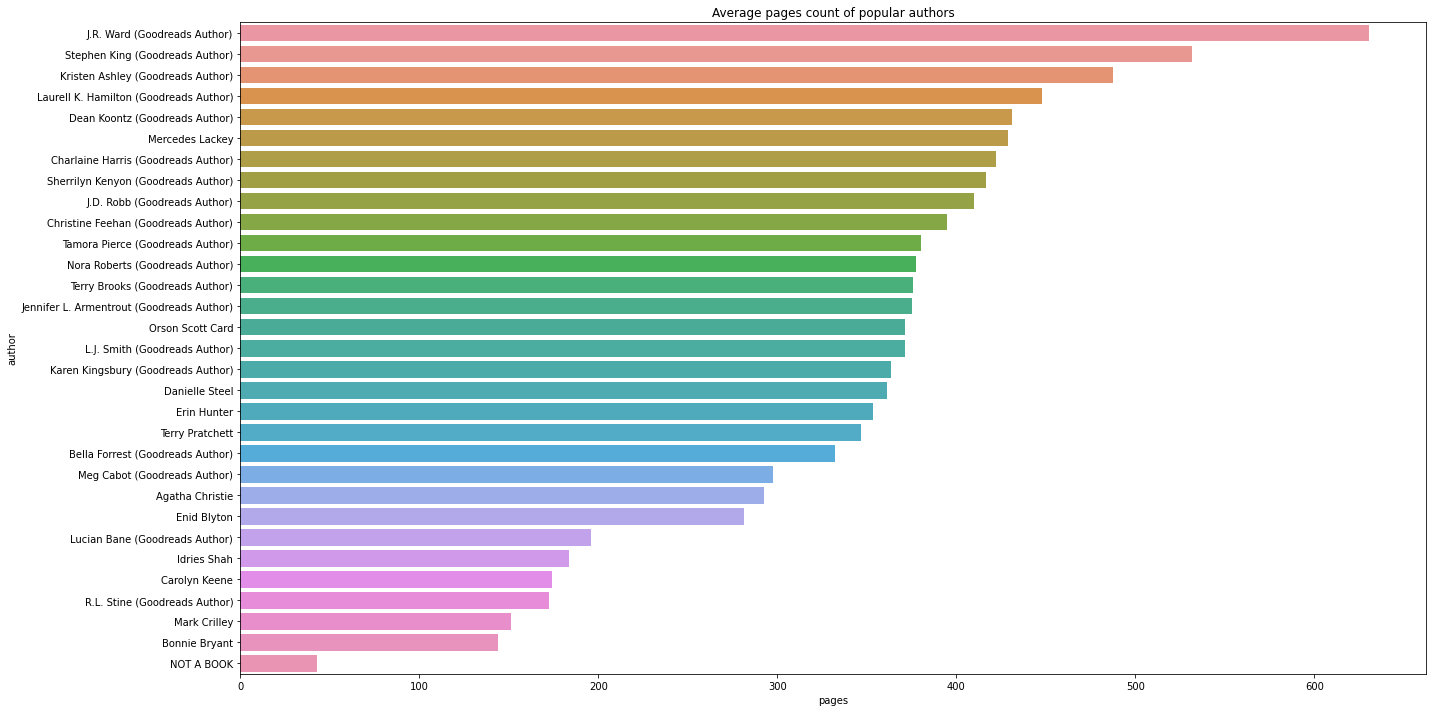

In [51]:
barplot(pop_author_info.index, pop_author_info['pages'], 'Average pages count of popular authors')

In [52]:
publisher_pop = books.groupby('publisher')['numRatings'].sum().sort_values(ascending=False)
publisher_pop.head()

publisher
Penguin Books                23903532
Little, Brown and Company    21858846
Vintage                      15459517
Ballantine Books             15113827
Scholastic Press             14804702
Name: numRatings, dtype: int64

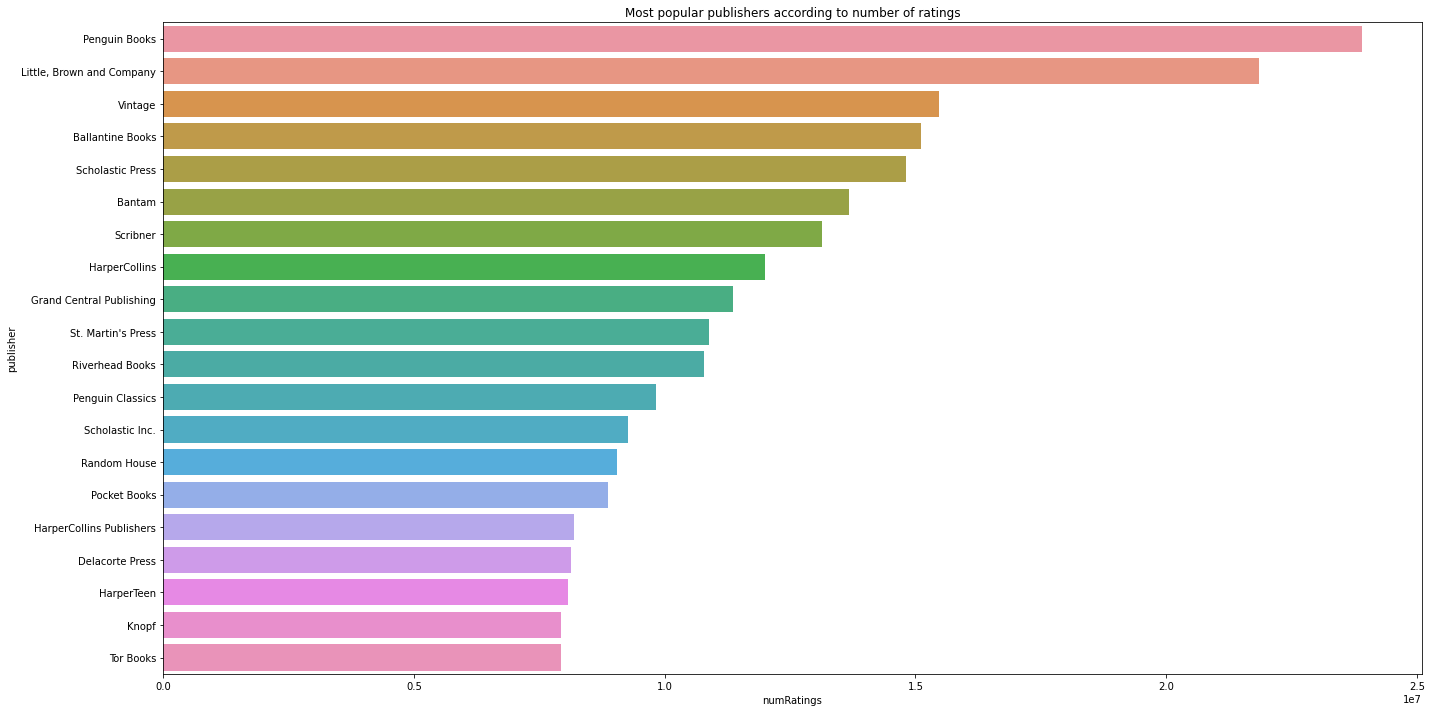

In [53]:
barplot(publisher_pop.head(20).index, publisher_pop.head(20), 'Most popular publishers according to number of ratings')

In [54]:
def genre_over_time(df, genre):
    genre_his = df.loc[df['genres'].str.contains(genre)]
    timeline = genre_his['publishDate'].value_counts().sort_index()
    lineplot(timeline, f'Over time changes in {genre} genre')
    
    
    
    
def author_over_time(df, name):
    author_history = df.loc[df['author'].str.contains(name)]
    timeline = author_history['publishDate'].value_counts().sort_index()
    barplot(timeline, timeline.index, f'Distribution of {name} books throughout the years')
    

def lineplot(timeline, title):
    plt.figure(figsize=(20,10))
    sns.lineplot(x=timeline.index, y=timeline)
    plt.title(title)
    plt.tight_layout()
    plt.show()

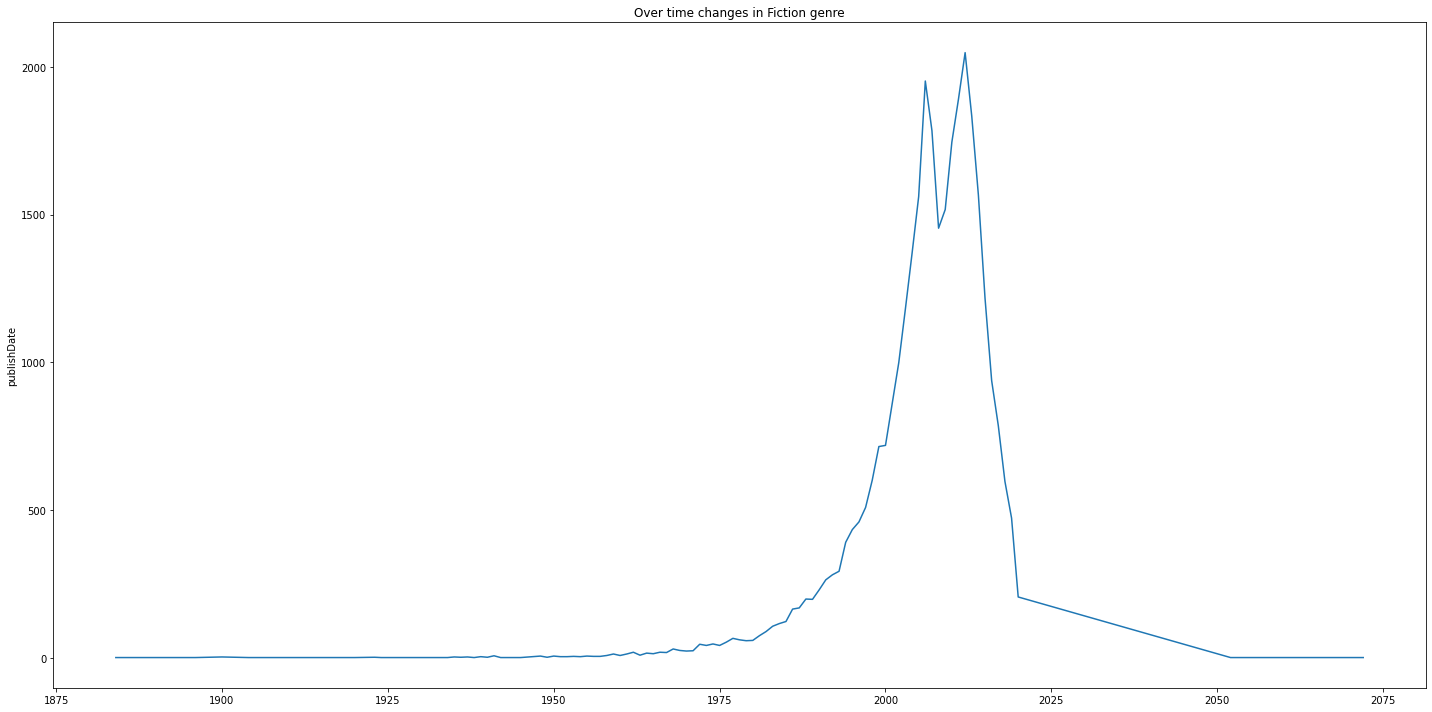

In [55]:
genre_over_time(books,'Fiction')


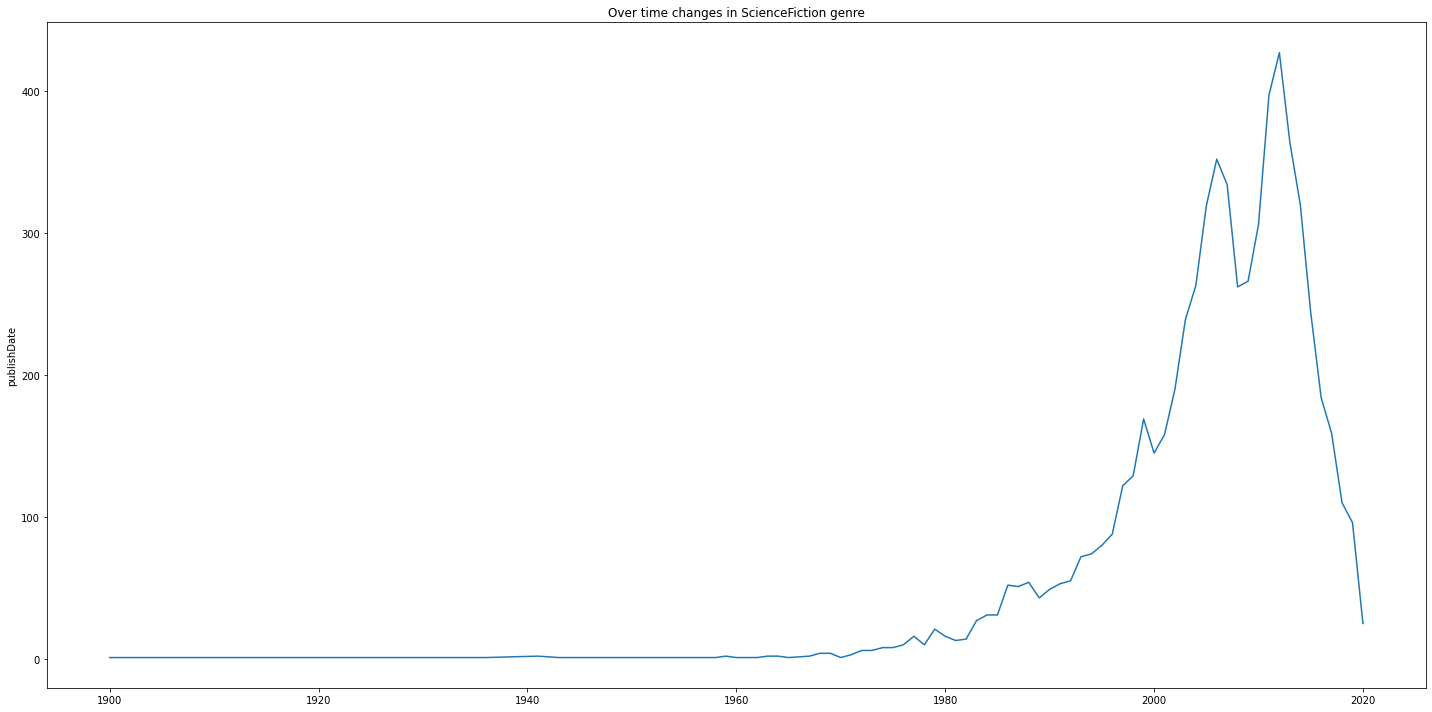

In [56]:
genre_over_time(books,'ScienceFiction')

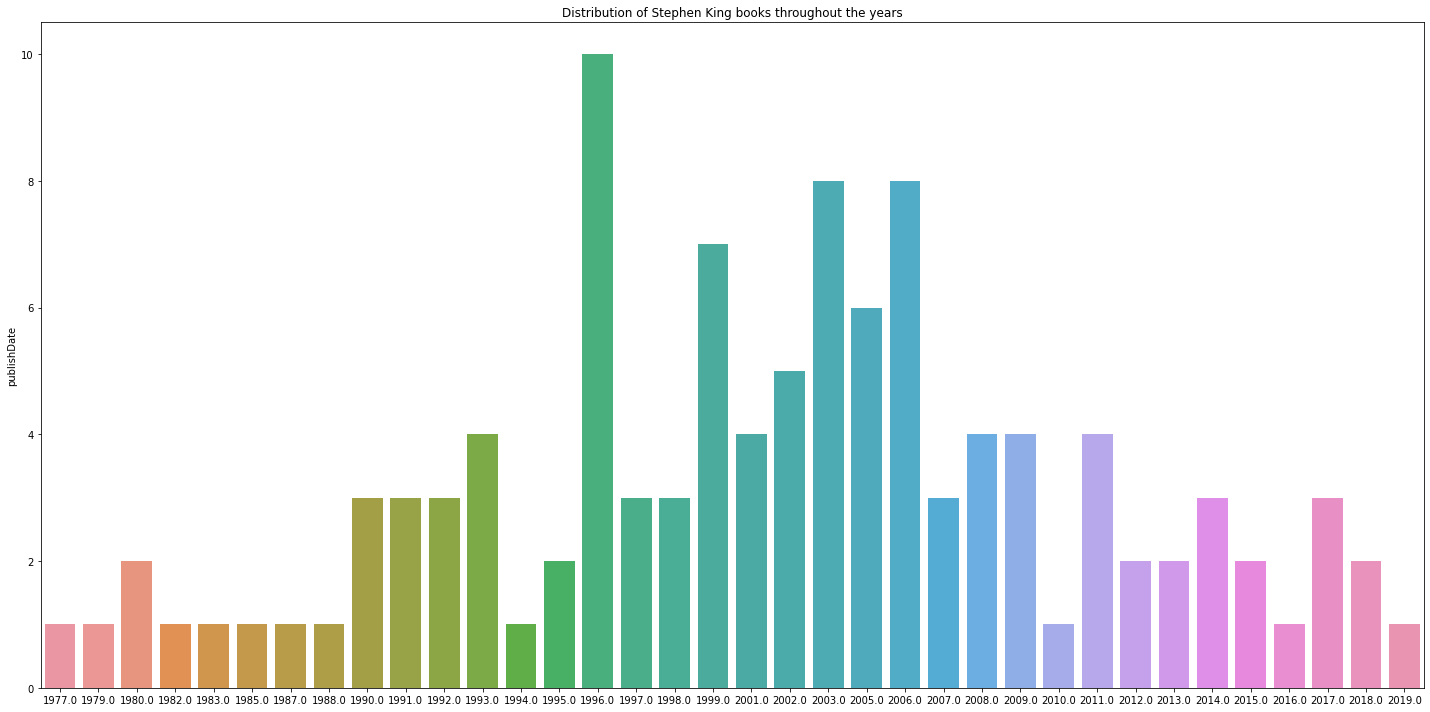

In [57]:
author_over_time(books, 'Stephen King')

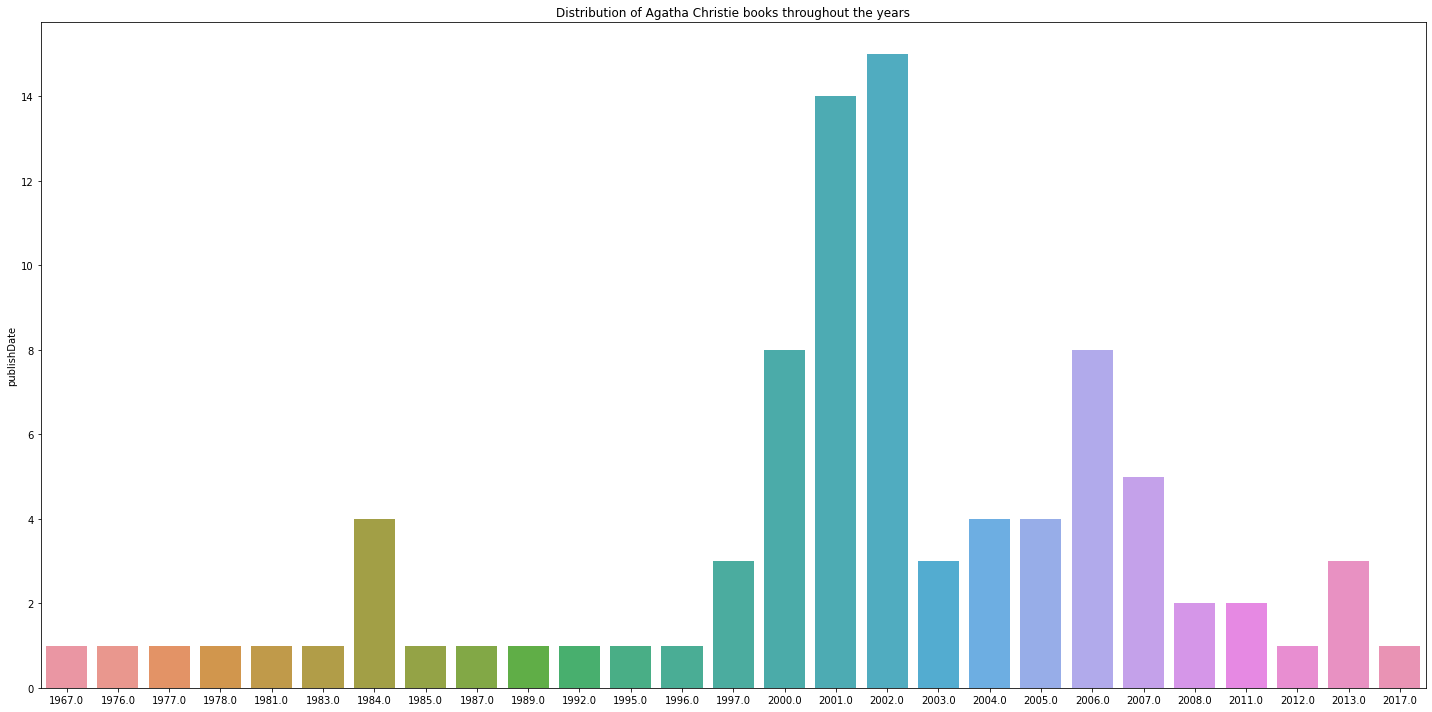

In [58]:
author_over_time(books, 'Agatha Christie')